In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Nome do arquivo CSV
nome_arquivo = "dados_exemplo_2.csv"

In [3]:
# Lendo os dados do arquivo CSV
dados_exemplo_2 = pd.read_csv(nome_arquivo)


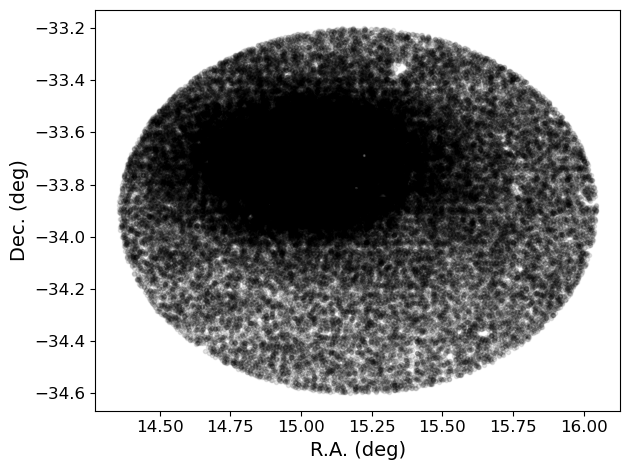

In [4]:
# Criando o gráfico
plt.plot(dados_exemplo_2["ra"], dados_exemplo_2["dec"], 'k.', alpha=0.1)
plt.xlabel("R.A. (deg)", fontsize=14)
plt.ylabel("Dec. (deg)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

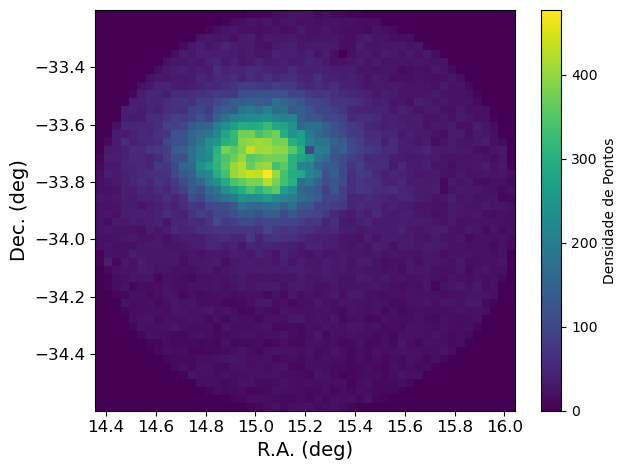

In [5]:
# Criando o histograma 2D
plt.hist2d(dados_exemplo_2["ra"], dados_exemplo_2["dec"], bins=50, cmap="viridis")
plt.xlabel("R.A. (deg)", fontsize=14)
plt.ylabel("Dec. (deg)", fontsize=14)
plt.colorbar(label="Densidade de Pontos")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()


In [6]:
dados = dados_exemplo_2
del dados_exemplo_2



In [7]:
new_columns = {"coadd_object_id": "object_id",
               "mag_auto_g_dered": "mag_g",
               "mag_auto_r_dered": "mag_r",
               "mag_auto_i_dered": "mag_i",
               "magerr_auto_g": "err_g", 
               "magerr_auto_r": "err_r", 
               "magerr_auto_i": "err_i"}

In [8]:
dados.rename(columns=new_columns, inplace=True)

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113021 entries, 0 to 113020
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   object_id  113021 non-null  int64  
 1   ra         113021 non-null  float64
 2   dec        113021 non-null  float64
 3   flags_g    113021 non-null  int64  
 4   mag_g      113021 non-null  float64
 5   mag_r      113021 non-null  float64
 6   mag_i      113021 non-null  float64
 7   err_g      113021 non-null  float64
 8   err_r      113021 non-null  float64
 9   err_i      113021 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 8.6 MB


In [10]:
dados.head()

,object_id,ra,dec,flags_g,mag_g,mag_r,mag_i,err_g,err_r,err_i
0,1128636312,14.851623,-34.535572,0,25.594648,24.823370,24.696671,0.299977,0.204951,0.307048
1,1128636390,14.852824,-34.536622,0,22.898720,21.429028,20.502132,0.046357,0.016810,0.012038
2,1128636240,14.855802,-34.534772,0,25.916723,24.726267,24.588079,0.387371,0.179757,0.266635
3,1128636601,14.862734,-34.538690,0,26.225990,26.029268,25.763897,0.503633,0.540424,0.770320
4,1128636512,14.867285,-34.538685,0,24.393425,22.745855,21.108515,0.207008,0.059084,0.023688


In [11]:
dados["gmr"] = dados.mag_g - dados.mag_r


In [12]:
dados.head()


,object_id,ra,dec,flags_g,mag_g,mag_r,mag_i,err_g,err_r,err_i,gmr
0,1128636312,14.851623,-34.535572,0,25.594648,24.823370,24.696671,0.299977,0.204951,0.307048,0.771278
1,1128636390,14.852824,-34.536622,0,22.898720,21.429028,20.502132,0.046357,0.016810,0.012038,1.469692
2,1128636240,14.855802,-34.534772,0,25.916723,24.726267,24.588079,0.387371,0.179757,0.266635,1.190456
3,1128636601,14.862734,-34.538690,0,26.225990,26.029268,25.763897,0.503633,0.540424,0.770320,0.196722
4,1128636512,14.867285,-34.538685,0,24.393425,22.745855,21.108515,0.207008,0.059084,0.023688,1.647570


In [13]:
dados.query("flags_g < 4  & mag_g != 99. & mag_r != 99. & mag_i != 99. ", inplace=True)


In [14]:
dados.count()

object_id    110833
ra           110833
dec          110833
flags_g      110833
mag_g        110833
mag_r        110833
mag_i        110833
err_g        110833
err_r        110833
err_i        110833
gmr          110833
dtype: int64

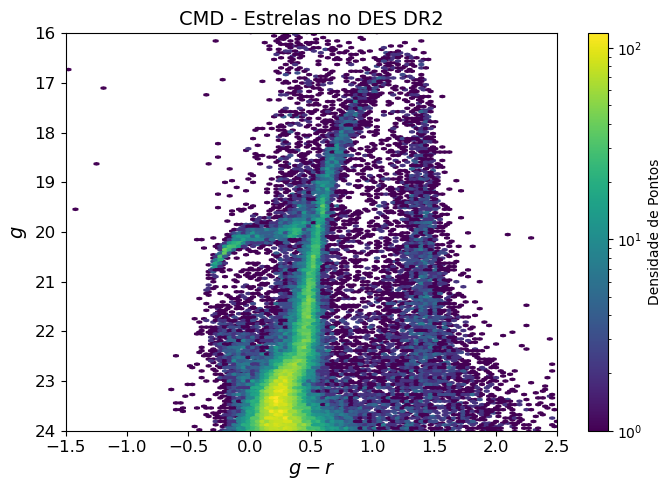

In [15]:
plt.figure(figsize=[7,5])
plt.title("CMD - Estrelas no DES DR2", fontsize=14)
plt.hexbin(dados.gmr, dados.mag_r, gridsize=500, bins='log') #Essa linha cria um gráfico hexbin usando Matplotlib, 
#que é particularmente útil para visualizar a densidade de pontos de dados em um espaço bidimensional.
plt.xlabel("$g - r$", fontsize=14)
plt.ylabel("$g$", fontsize=14)
plt.colorbar(label="Densidade de Pontos")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-1.5,2.5)
plt.ylim(24,16)
plt.tight_layout()